In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = pd.read_csv("si_dataset3class.csv")

In [4]:
msk = np.random.rand(len(data)) < 0.8

In [5]:
train_data = data[msk]

In [6]:
test_data = data[~msk]

In [7]:
train_data.shape

(48296, 7)

In [8]:
data.head(3)

,theft,i1,i2_d,i2_c,i3,i4_d,i4_c
0,0,1.006812,1.672970,0.344686,1.075048,0.702430,0.703270
1,0,1.022372,3.571808,0.232143,1.260891,1.751116,0.499984
2,0,1.036973,1.681122,0.303175,1.547288,1.137088,0.746598


In [9]:
import matplotlib.pyplot as plt

In [10]:
y = data.groupby('theft').size()

In [11]:
y

theft
0    50300
1     4982
2     5078
dtype: int64

In [12]:
labels = ["No Fraud", "Simple Fraud", "Serious Fraud"]

In [13]:
import numpy as np

In [14]:
index = np.arange(len(labels))

In [15]:
index

array([0, 1, 2])

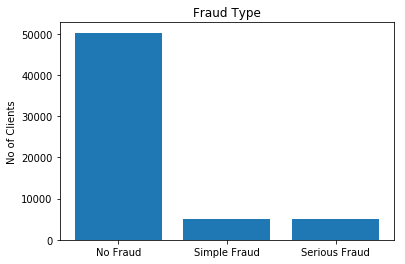

In [16]:
plt.bar(index, y)
plt.ylabel('No of Clients')
plt.xticks(index, labels)
plt.title('Fraud Type')
plt.show()

In [17]:
data.describe()

,theft,i1,i2_d,i2_c,i3,i4_d,i4_c
count,60360.000000,60360.000000,60360.000000,60360.000000,60360.000000,60360.000000,60360.000000
mean,0.250795,1.016270,2.091886,0.514931,0.981853,1.845524,0.569263
std,0.596791,0.674263,1.272459,0.292357,0.488912,0.963360,0.278737
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.410435,-1.000000
25%,0.000000,0.820936,1.221551,0.352275,0.661958,1.244127,0.465050
50%,0.000000,0.982537,1.890044,0.569878,0.922130,1.626202,0.639124
75%,0.000000,1.155823,2.723595,0.732081,1.231326,2.174066,0.759117
max,2.000000,88.888889,20.493902,1.000000,8.924818,26.542419,1.000000


In [18]:
corr = data.corr()
import seaborn as sns

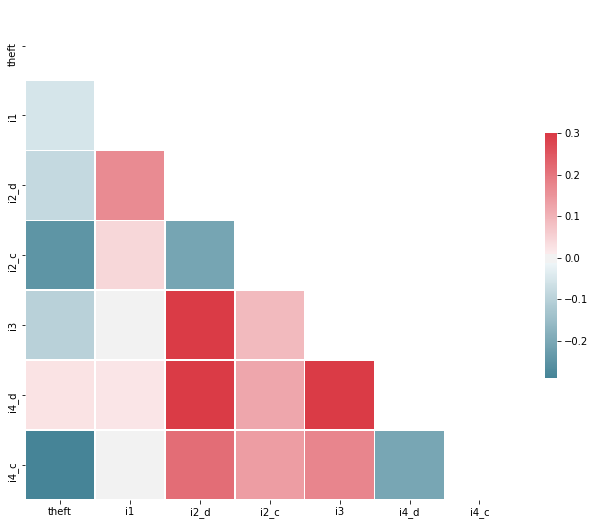

In [19]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
train_data.shape

(48296, 7)

In [21]:
y = train_data.iloc[:, 0]

In [22]:
X = train_data.iloc[:, 1:]

In [24]:
from sklearn import svm

In [25]:
lin_clf = svm.LinearSVC()

In [26]:
lin_clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [27]:
pred = lin_clf.predict(test_data.iloc[:, 1:])

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(test_data.iloc[:, 0], pred)

0.8328912466843501

In [30]:
import xgboost as xgb